ALGUNAS DEFINICIONES:

- Overflow: El overflow es una condicion en la que una operacion aritmetica intenta crear un valor numerico que es demasiado grande para ser representado dentro del rango permitido por el tipo de dato utilziado.

    Tipos de Overflow:
        
        1- Overflow en enteros:

            - Ocurre caundo una operacion aritmetica sobrepasa el limite superior o inferior del rango de valores que un tipo de dato entero puede representar
            - Ejemplo con enteros de 8 bits:
                - Rango de valores: -128 a 127.
                - Si sumamos 1 a 127, el resultado deberia ser 128, pero es un entero de 8 bits, esto causara un desbordamiento y el resultado sera -128 (debido a la reepresentacion en complemento a dos)
        
        2- Overflow en punto flotante:
            
            - Sucede cuando un numero en punto flotante (como float o double) excede el rango que puede ser representado.
            - En C, los numeros en punto flotante que desbordan se convierten en infinity.

- Flags: Una flag o bandera en programacion es un valor que indica si una caracterisitca especifica o un modo esta habilitado o deshabilitado. Se utiizan ampliamente para represnetan estados binarios (encedido/apagado, verdadero/falso) o para gestionar configuraciones multiples en una unica variable.

- Mascaras: Una mascara es un valor utilizado en operaciones bit a bit para seleccionar (mascarar) bits especificos de otro valor. Las mascaras son utiles para extrar o modificar partes de un numero, a menudo en operaciones de bajo nivel como manipulacion de permisos o configuraciones de hardware.

- Direccion virtual: Una direccion virtual es una direccion generada por el programa en ejecuccion. No corresponde neceariamente a una ubicacion fisica en la memoria RAM. En lugar de eso, es una referencia en el espacio de direcciones del proceso, lo que permite que cada proceso tenga su propio espacio de direcciones independientes.

    Ventajas:
        
        1- Aislamiento de procesos: Cada proceso tiene su propio espacio de direcciones, evitando que interfieran entre si.
        2- Seguridad: Los procesos no pueden acceder a la memoria de otros procesos directamente.
        3- Facilidad de uso: Los programas pueden utilizar direcciones continuas y logicas, independientemente de la memoria fisica disponible.
        4- Gestion de memoria: Permite el uso de tecnicas como la paginacion y la segmentacion para gestionar la memoria de manera eficiente.

- Direccion fisica: Una direccion fisica es una ubicacion real en la memoria RAM. Es la direccion que la unidad de gestion de memoria (MMU) del hardware accede fisicamente para almacenar o recuperar datos.

- Traduccion de direcciones: El proceso de convertir direcciones virtuales a direcciones fisicas se llama traduccion de direcciones. Essto lo hace la MMU usando una tabla de paginas que mantiene el sistema operativo.

    Ejemplo de paginacion:
    
    - La memoria se divide en bloques del mismo tamanio llamados paginas (en el espacio virtual) y marcos (en el espacio fisico).

El operador AND bit a bit se utiliza a menudo en operaciones que implican direcciones de memoria, especialmente en la gestion de memoria y la traduccion de direcciones virtuales a fisicas.

Ejemplo de uso del operador AND en la traduccion de direcciones virtuales a fisicas.

Supongamos que tenemos una direccion virtual de 32 bits y queremos obtener la pagina y el desplazamiento dentro de la pagina. Las direcciones de memoria virtuales se dividen en dos partes:

- Bits superiores: identifican la pagina
- Bits inferiores: identifican el desplazamiento dentro de la pagina

Para simplificar, consideramos una arquitectura donde:
    
- La direccion de 32 bits tiene los primeros 20 bits como identificador de pagina
- Los ultimos 12 bits como desplazamiento dentro de la pagina

Mascara de bits

Usaremos una mascara para aislar la parte de la direccion que nos interesa:

- Para obtener el identificador de pagina, usamos la mascara 0xFFFFF000
- Para obtener el desplazamiento, usaremos la mascara 0x00000FFF

In [ ]:
#include <stdio.h>

int main() {
    // Ejemplo de dirección virtual (en hexadecimal)
    unsigned int direccion_virtual = 0x12345678;

    // Máscaras
    unsigned int mascara_pagina = 0xFFFFF000; // Máscara para obtener el número de página
    unsigned int mascara_desplazamiento = 0x00000FFF; // Máscara para obtener el desplazamiento

    // Obtener el número de página
    unsigned int numero_pagina = (direccion_virtual & mascara_pagina) >> 12;

    // Obtener el desplazamiento dentro de la página
    unsigned int desplazamiento = direccion_virtual & mascara_desplazamiento;

    // Imprimir resultados
    printf("Dirección virtual: 0x%X\n", direccion_virtual);
    printf("Número de página: 0x%X\n", numero_pagina);
    printf("Desplazamiento: 0x%X\n", desplazamiento);

    return 0;
}

Salida esperada:

Dirección virtual: 0x12345678
Número de página: 0x12345
Desplazamiento: 0x678

El operador OR bit a bit se usa oara combinar bits de dos operandos. Si al menos uno de los bits en una posicion es 1, el bit resultante sera 1.

Uso de Flags y permisos:

- En sistemas operativos, los permisos y modos de archivo a menudo se gestionan utilizando enteros donde cada bit representa una flag diferente. El operador OR se utiliza para combinar estsas banderas

Ejemplo: Uso de flags para modos de archivo

- Supongamos que tenemos un conjunto de banderas que representan diferentes modos de acceso a un archivo:

    - Leer (READ): 0x1 (0001 en binario)
    - Escribir (WRITE): 0x2 (0010 en binario)
    - Ejectuar (EXECUTE): 0x4 (0100 en binario)
    - Eliminar (DELETE): 0x8 (1000 en binario)

Podemos combinar estas banderas utilizando el operador OR para especificar multiples permisos.

In [ ]:
#include <stdio.h>

#define READ   0x1  // 0001 en binario
#define WRITE  0x2  // 0010 en binario
#define EXECUTE 0x4 // 0100 en binario
#define DELETE 0x8  // 1000 en binario

int main() {
    // Especificar permisos de archivo combinando banderas
    int permisos = READ | WRITE; // Leer y Escribir

    // Comprobar si los permisos incluyen Leer
    if (permisos & READ) {
        printf("Permiso de lectura está habilitado.\n");
    }

    // Comprobar si los permisos incluyen Escribir
    if (permisos & WRITE) {
        printf("Permiso de escritura está habilitado.\n");
    }

    // Comprobar si los permisos incluyen Ejecutar
    if (permisos & EXECUTE) {
        printf("Permiso de ejecución está habilitado.\n");
    } else {
        printf("Permiso de ejecución no está habilitado.\n");
    }

    // Añadir permiso de ejecución
    permisos |= EXECUTE;

    // Verificar si se agregó el permiso de ejecución
    if (permisos & EXECUTE) {
        printf("Permiso de ejecución ahora está habilitado.\n");
    }

    return 0;
}


El operador OR tambien se utiliza frecuentemente con la funcion mmap en sistemas Unix/Linux para especificar multiples opciones de mapeo de memoria. La funcion mmap se utiliza para asignar un archivo o un dispositivo a la memoria, y sus opciones de configuracion se pasan mediante un conjunto de flags que se combinan utilizando el operador OR.

Ejemplo de uso de mmap con flags combinadas:

void *mmap(void *addr, size_t length, int prot, int flags, int fd, off_t offset);

- addr: Direccion sugerida de memoria donde mapear el archivo (normalmente se pasa NULL para que el sistema elija la direccion)
- length: Tamanio del mapeo
- Prot: Protecciones del mapeo (combinacion de PROT_READ, PROT_WRITE, PROT_EXEC)
- flags: Tipos de mapeo (combinacion de MAP_SHARED, MAP_PRIVATE, etc)
- fd: Descriptor de archivo del archivo que se va a mapear
- offset: Desplazamiento dentro del archivo.

Bitmask:

Acceder y manipular bits directamente es fundamental en muchas aplicaciones de programación de bajo nivel, como la programación de sistemas y el desarrollo de firmware. Esto se hace mediante máscaras de bits (bitmasks). Las máscaras de bits permiten seleccionar, establecer, limpiar o invertir bits específicos dentro de un valor.

Una máscara de bits es un número utilizado en operaciones bit a bit para seleccionar o modificar bits específicos en otro número. Las operaciones bit a bit incluyen AND (&), OR (|), XOR (^) y NOT (~).

Arquitectura ARMv8:

La arquitectura ARMv8 pertenece a la familia de procesadores ARM, que son de tipo RISC (Reduced Instruction Set Computing), en contraste con CISC (Complex Instruction Set Computing).

Diferencias entre RISC y CISC

- RISC:
    - Conjunto reducido de instrucciones simples y rapidas
    - Cada instruccion realiza una operacion muy basica y se ejecuta en un solo ciclo de reloj.
    - Ejemplo: ARM, MIPS

- CISC:
    - Conjunto amplio de instrucciones complejas que pueden realizar tareas mas complicadas.
    - Una instruccion puede ejecutar multiples ciclos de reloj.
    - Ejemplos: x86, VAX.

La relación entre ARMv8 y las máscaras de bits (bitmasks) radica en la forma en que la arquitectura ARMv8, como otras arquitecturas RISC, utiliza operaciones a nivel de bits para manipular datos de manera eficiente. En ARMv8, las instrucciones son de 32 bits y están diseñadas para operaciones rápidas y simples, que a menudo implican la manipulación de bits individuales o grupos de bits dentro de registros.

Bitmasks en ARMv8:

Las máscaras de bits son utilizadas en ARMv8 para diversas tareas, incluyendo:

- Manipulación de Registros: Los registros del procesador pueden ser manipulados utilizando operaciones bit a bit, que son fundamentales para el control de hardware, manejo de banderas (flags), y optimización de código.
- Control de Flujos de Datos: Permiten habilitar o deshabilitar bits específicos dentro de registros, lo que es útil para configurar periféricos, ajustar modos de operación, y gestionar interrupciones.
- Optimización de Código: Las instrucciones de ARMv8 están optimizadas para realizar operaciones bit a bit de manera rápida y eficiente, permitiendo realizar múltiples tareas con una sola instrucción.

En la arquitectura ARMv8, la instruccion ADD (shifted register) es una variante de la instruccion basica de suma ('ADD') que permite sumar dos regsitros, donde uno de los registros puede ser desplazado antes de la operacion de suma.

Desgolse de instruccion

- ADD: Esta es la operacion principal que realiza una suma de dos valores

- Shifted register: Indica que uno de los operandos de la suma no es solo el valor de un registro, sino el valor de un regsitro despues de haber sido desplazado (shifted).

Sintaxis general:

- <destino>: El regsitro donde se alamcenara el resultado de la operacion

- <regsitro1>: El primer operando de la suma

- <registro2>: El segundo operando de la suma, que sera desplazado antes de ser sumado.

- <shift_op>: Especifica el tipo de desplazamiento (shift) que se aplicara al segundo regsitro. Puede ser un desplazamiento logico a la izquierda (LSL), logico a la derecha (LSR), aritmetico a la derecha (ASR), o rotacion a la derecha (ROR)

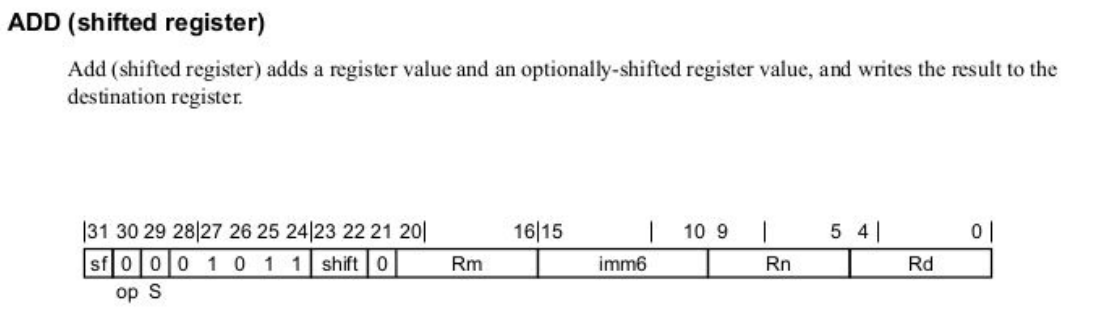

La imagen muestra el formato de la instruccion 'ADD' (shifted register) en la arquitectura ARMv8. 

Campos de la instruccion

1- sf (bit 31): Este es el bit de tamanio del registro:
- 0 indica una operacion de 32 bits.
- 1 indica una operacion de 64 bits.

2- op (bit 30): Determina si la operacion es una suma ('ADD') o una resta ('SUB'):

- 0 para 'ADD'
- 1 para 'SUB'

3- S (bit 29): Es el bit de actualizacion de los flags del procesador (condicion):

- 0 para actualizar los flags.
- 1 actauliza los flags (esto se usa si queres que la operacion afecte los flags de condicion como Z, N, C y V)

4- Shift (bits 23-22): Este campo especifica el tipo de desplazamiento que se aplicara al valor del regsitro rm:

- 00: LSL (Logical Shift Left)
- 01: LSR (Logical Shift Right)
- 10: ASR (Arithmetic Shift Right)
- 11: ROR (Rotate Right)

5- Rm (bits 20-16): Es el registro fuente que se utilizara como segundo operando, el cual sera desplazado segun el campo shift y el varlo en imm6.

6- imm6 (bits 15-10): Es un valor inmediato de 6 bits que indica cuantos lugares se debe desplazar el registro Rm antes de realizar la operacion de suma o resta.

7- Rn (bits 9-5): Es el regsitro fuente que se utilizara como primer operando en la operacion de suma o resta.

8- Rd (bits 4-0): Es el registro destino donde se almacenara el resultado de la operacion.

Resumen de la operacion:

La instruccion 'ADD (shited register)' en ARMv8 suma el valor del registro Rn con el valor del regsitro Rm despues de que este ha sido desplazado segun las especificaciones en los campos 'shift' e 'imm6'. El resutlado de esta operacion se almacena en el registro Rd.

Bit shiffting (desplazamiento de bits) es una operacion que mueve los bits en una secuencia binaria hacia la izquierda o hacia la derecha. Existen varios tipos de desplazamiento de bits, pero los mas comunes son el desplazamiento logico y el desplazamiento aritmetico. 

1- Desplazamiento logico (Logical Shift):

- Desplazamiento a la izquierda (LSL - Logical Shift Left): Los bits se mueven a la izquierda, y los espacios vacios que quedan a la derecha se rellenan con ceros.

Ejemplo: Desplazamiento a la izquierda por 2 posiciones.

Original:    0010 1101  (45 en decimal)
LSL por 2:   1011 0100  (180 en decimal)

En este caso:

- Los bits se desplazaron 2 posiciones a la izquierda

- Los dos espacios vacios a la derecha se llenaron con ceros.

- Propiedades del left shift:

    - Multiplica el numero por 2^n, n siendo el numero de lugares que se deszplaza.

    - Es muy eficiente para el CPU, O(1)

    - Funciona mientras el resultado entre (por ejemplo (4) 0100 en un int de 4 bits se convierte en (-8) 1000 porque no entra (overflow))

    - Se le agrega un cero en el lugar desplazador

- Desplazamiento a la Derecha (LSR - Logical Shift Right): Los bits se mueven a la derecha, y los espacios vacios que quedan a la izquierda se rellenan con ceros.

Ejemplo: Desplazamiento a la derecha por 2 posiciones

    - Original: 0010 1101 
    - LSR por 2: 0000 1011

En este caso:

    - Los bits se desplazaron 2 posiciones a la derecha
    - Los dos espacios vacios a la izquierda se llenaron con ceros.




2- Desplazamiento Aritmetico (Arithmetic Shift)

- Desplazamiento Aritmetico a la Derecha (ASR - Arithmetic Shft Right): Similar al desplazamiento logico a la derecha, pero en lugar de rellenar con ceros, se conserva el bit mas significativo (el bit de signo en numeros con signo). Esto es util para mantener el signo de un numero al dividrlo por potencias de 2.

- Ejemplo: Desplazamiento aritmetico a la derecha por 2 posiciones.

    - Original: 1010 1101 
    - ASR por 2: 1110 1011

- Propiedades de (arithmetic) right shifts (x >> n):

    - Divide por 2^n, n siendo la cantidad de lugares desplazados
    - El resultado es truncado, entonces hace floor para abajo.
        - Osea 7 >> 1 = 3
        - Pero -7 >> 1 = -4 (por que -4 es menor que -3)
        - Y -1 >> 1 == -1 (1111 >> 1 == 1111, redondea para abajo).
    - Se puede castear un int a uint para cambiar la operacion a logica.

Aca:

    - Los bits se desplazaron 2 posiciones a la derecha

    - Los dos espacios vacios a la izquierda se rellenaron con el bit de signo original (1, en este caso).

- Desplazamiento aritmetico a la izquierda (ASL - Arithmetic Shift Left): Es lo mismo que un desplazamiento logico a la izquierda (LSL) y no cambia el bit de signo

Ejemplo:

    - Original:    1010 1101  (número negativo en representación de complemento a 2, -83 en decimal)
    - ASL por 2:   1011 0100  (-180 en decimal)



3- Rotacion de bits (Rotate)

- Rotacion a la derecha (ROR - Rotate Right): Los bits se desplazan a la derecha, y los bits que "salen" del extremo derecho se vuelven a insertar en el extremo izquierdo.

Ejemplo: Rotacion a la derecha por 2 posiciones


    - Original:    0010 1101  (45 en decimal)
    - ROR por 2:   0100 1011  (75 en decimal)

Aca:

Los bits desplazados a la derecha (1 y 1 en este caso) se insertan nuevamente desde la izquierda.

Arithmetic vs Logical:

1- Desplazamientos en C:

- Desplazamiento Logico (Logical Shift):

    - Se aplica a tipos sin signo (unsigned int, unsigned long, etc).
    - Los bits se desplazan hacia la izquierda o hacia la derecha y los espacios vacios se rellenan con ceros.

- Desplazamiento Aritmertico (Arithmetic Shift):

    - Se aplica a tipos con signo (int, long, etc).
    - En un desplazamiento a la derecha, el bit mas significativo (el bit de signo) se replica para mantener el signo del numero. Esto no afecta los desplazamientos a la izquierda, que funcionan igual que el desplazamiento logico.

2- Desplazamiento a la izquierda:

- Tanto en desplamazmientos logicos como aritmetico, el desplazamiento a la izquierda desplaza los bits a la izquierda y llena los espacios vacios a la derecha con ceros.

- Esto significa que ambos tipos de datos (con signo y sin signo), el resultado de un desplazamiento a la izquierda es el mismo.

3- Cambiar el comportamiento del desplazamiento:

- Casteo (casting): Se puede cambiar el comportamiento de un desplazmiento de bits simplemente cambiando el tipo de la variable mediante un cast.

- Por ejemplo, si tienes un int (con signo) y deseas aplicar un desplazamiento logico en lugar de un desplazamiento aritmetico, se puede castear el int a un unsigned int antes de aplicar el desplazamiento.

Ejemplo:

int a = -8;           // -8 en binario (int con signo): 11111111 11111111 11111111 11111000
int b = a >> 2;       // Desplazamiento aritmético: 11111111 11111111 11111111 11111110 (b = -2)
unsigned int c = (unsigned int)a >> 2; // Casteo a unsigned: 00111111 11111111 11111111 11111110 (c = 1073741822)

- Sin casteo (int b = a >> 2;): Realiza un desplazamiento aritmético manteniendo el bit de signo (los bits de la izquierda se rellenan con 1 si el número es negativo).

- Con casteo (unsigned int c = (unsigned int)a >> 2;): Al castear a un tipo sin signo, el desplazamiento se realiza de manera lógica, llenando con ceros en la izquierda.

Resumen:

- C automáticamente elige el tipo de desplazamiento según el tipo de dato (signo para aritmético, sin signo para lógico).

- Desplazamiento a la izquierda produce el mismo resultado tanto para tipos con signo como sin signo.

- Puedes cambiar el tipo de una variable mediante un casteo para alterar el comportamiento del desplazamiento (aritmético a lógico y viceversa).


Las banderas (flags) de condicion son parte de los registros de estado en muchas arquitecturas de procesadores, incluyendo ARM y x86, y se utilizan para indicar el resultado de operaciones aritmeticas y logicas. Estas banderas permiten que el procesador tome decisiones badas en los resultados de las operaciones.

1- Overflow Flag (O):

- Proposito: Indica que el resultado de una operacion aritmetica con signo (signed) ha excedido el rango que puede representarse con el numero de bits disponibles.

- Ejemplo: Si estás trabajando con enteros de 8 bits, el rango de números con signo es de -128 a 127. Si sumas dos números que deberían dar un resultado fuera de este rango (por ejemplo, 100 + 50), el resultado no puede representarse correctamente en 8 bits, y el flag de overflow se activará.

- Situaciones comunes:
Suma de dos números positivos que da un número negativo.
Resta de dos números negativos que da un número positivo.

2- Carry Flag (C):

- Proposito: Indica que una operacion aritmetica sin signo (unsigned) ha producido un resultado que requiere un bit extra, es decir, que el resultado ha excedido la capacidad del numero de bits disponibles o que se ha producido un "prestamo" en una resta.

- Ejemplo: Si sumas dos números de 32 bits sin signo y el resultado es mayor que 2^32 - 1, el carry flag se activará.

- Diferencia con Overflow:
    - Carry Flag: Relacionado con operaciones sin signo. Indica que hubo un "carry out" del bit más significativo.
    - Overflow Flag: Relacionado con operaciones con signo. Indica que el resultado no cabe en el rango del tipo de dato con signo.

3- Zero Flag (Z):

- Proposito: Indica que el resultado de una operacion es cero.

- Ejemplo: Si restas dos numeros iguales (Por ejemplo, '5 - 5'), el resultado es 0 y el zero flag se activara.

- Uso comun: Se utiliza en condiciones de comparacion para determinar si dos valores son iguales.

4- Negative Flag (N):

- Proposito: Indica que el resultado de una operacion aritmerica o logica es negativo.

- Ejemplo: Si sumas dos numeros y el resultado es un numero negativo en la representacion con signo (por ejemplo, '-5'), el negative flag se activara.

- Detalles: Este flag se basa en el bit mas significativo del resultado en operaciones con signo. En un sistema de 32 bits, si el bit 31 (el bit de signo) es 1, entonces el resultado es negativo y el flag N se activa.

Resumen:

- Overflow Flag (O): Se activa cuando el resultado de una operación con signo no cabe en el rango representable.

- Carry Flag (C): Se activa en operaciones sin signo cuando el resultado es demasiado grande o demasiado pequeño (overflow o underflow).

- Zero Flag (Z): Se activa cuando el resultado de la operación es exactamente 0.

- Negative Flag (N): Se activa cuando el resultado es un número negativo en operaciones con signo.

Estas banderas permiten que el procesador controle flujos de ejecución condicionalmente, lo que es fundamental en la toma de decisiones dentro de programas y sistemas operativos.

Big endian little endian

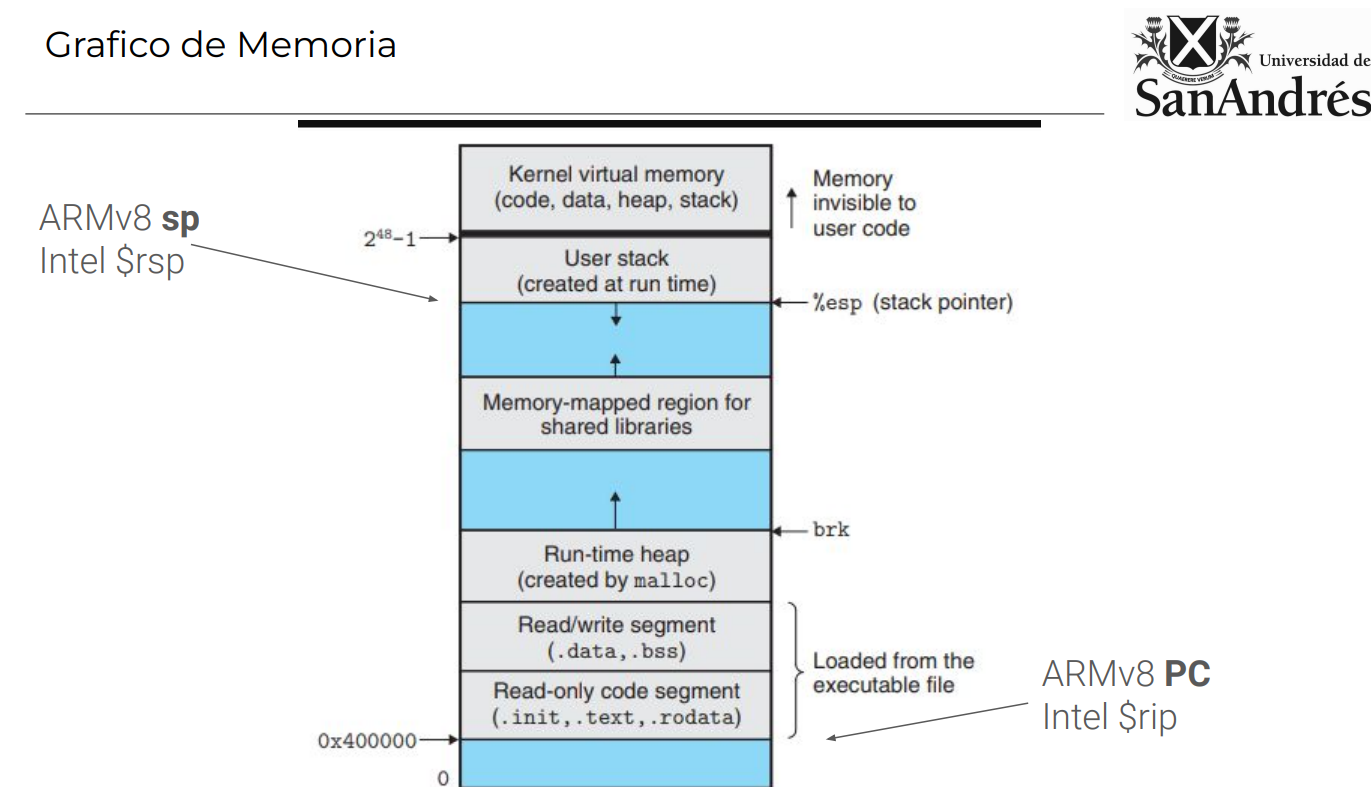

La imagen representa la organizacon de la memoria en un sistema de computacion comparando las arquitecturas ARMv8 y x86 (Intel)

1- Grafico de memoria:

- Este grafico muestra como se organiza la memoria virtual en un sistema operativo moderno. La memoria virtual es un espacio de direcciones que el sistema operativo asigna a cada proceso, lo que le da a cada proceso la ilusion de tener todo el espacio de memoria disponible para el solo.

2- Segmentos de memoria:

- Kernel Virtual Memory (Memoria Virtual del Kernel):

    - Es la parte superior de la memoria que esta reservada para el kernel del sistem operativo
    
    - Esta memoria es invisible para el codigo de usuario, lo que significa que los programas normales no puede acceder directamente a esta area.

    - El kernel gestiona los recursos y la seguridad del sistema, y su memoria incluye codigos, datos, heap y stack especifico para el kernel.

- User Stack (pila de usuario)

    - Justo debajo de la memoria del kernel esta la pila del usuario

    - La pila es una estructura de datos que almacena informacion como variables locales y direcciones de retorno. Crece desde direcciones altas hacia direcciones bajas en la memoria.

    - En el grafico, la pila se gestiona mediante el Stack Pointer ('sp' en ARMv8 y '$rsp' en intel x86). Este puntero indica la ubicacion actual de la cima de la pila

- Memory-Mapped Region for Shared Libraries (Region Mapeada para Librerias Compartidas):

    - Esta seccion se utiliza para mapear en memoria las librerias compartidas, como las bibliotecas dinamcicas ('.so' en linux o '.dll' en windows).

    - Permite que multiples procesos compartan el mismo codigo en memoria, ahorrando espacio.

- Run-time Heap (Heap en Tiempo de Ejecucion):

    - La heap es la region de memoria utilizada para la asignacion dinamica (por ejemplo, usando 'malloc' en C).

    - Crece desde direcciones bajas hacia direcciones altas.

    - El puntero 'brk' gestiona el limite superior de la heap

- Read/Write Segment (Segmento de lectura/escritura):

    - Incluye las secciones '.data' y '.bss'.

    - '.data': Contiene las variables globales y estaticas inicializadas.

    - '.bss': Contiene las variables globales y estaticas no inicializadas.

    - Estas secciones permiten la lectura y escritura, a diferencia del codigo, que solo es de lectura.

- Read-only Code Segment (Segmento de Codigo de Solo Lectura):

    - Incluye las secciones '.init', '.text' y '.rodata'.

    - '.text': Contiene el codigo ejecutable del programa

    - '.rodata': Contiene datos de solo lectura, como las cadenas constantes.

3- Punteros importantes:

- ARMv8 'sp' (Stack Pointer) / Intel '$rsp':
    
    - Este puntero indica la posicion actual de la cima de la pila

    - En ARMv8, se denomina 'sp', mientras que en intel x86, es '$rsp'.

- ARMv8 'pc' (Program Counter) / Intel '$rip':
    
    - El Program Counter (PC), llamado '$rip' en x86, es un registro que guarda la direccion de la siguiente instruccion a ejecutar.

    - Este punteor se mueve a medida que el programa avanza, indicando la ubicacion en la memoria de la instruccion actual.

4- Direcciones de Memoria:

- El grafico muestra la direccion de memoria mas baja en la parte inferior (0x400000 en este caso), que es donde se carga el archivo ejecutable.

- Las direcciones aumentan hacia arriba, donde se encuentra la memoria del kernel.

Resumen:

Este gráfico proporciona una visión general de cómo está estructurada la memoria en un sistema que ejecuta programas bajo un sistema operativo. La memoria está dividida en secciones específicas para código, datos, heap, y pila. Los punteros sp y PC ($rsp y $rip en x86) son registros importantes que controlan la ejecución del programa y la gestión de la pila. Cada arquitectura, ya sea ARMv8 o Intel, tiene sus propios registros y convenciones, pero la organización general de la memoria es bastante similar.

C se compila a Assembly:

- Lenguaje C: C es un lengaje de programacion de alto nivel que permite escribir programas de forma relativamente abstracta y portatil. Sin embargo, para que un porgrama en C se ejecute en una maquina, debe ser traducido a un lenguaje que la maquina pueda entender directamente.

- Compilacion: El proceso de compilacion traduce el codgio fuente escrito en C a codigo en ensamlador (assembly), que es un lenguaje de bajo nivel, mucho mas cercano al codigo de maquina.

- Assembly: El codigo en ensamblador es una representacion textual de las instrucciones que la CPU ejecutara. Cada instruccion en ensamblador corresponde generalmente a una instruccion de maquina, que es un conjunto especifico de codigos binarios que la CPU puede ejecutar directamente.

- Codigo maquina: Finalmente, el ensamblador (un pograma que forma aprte del proceso de compilacion) traduce las instrucciones de assembly a codigo de maquina, que son instrucciones en formato binario que la CPU entiende y ejecuta directamente.

Instrucciones de Assembly y la Maquina de Turing

- Maquina de Turing: La maquina de Turing es un concepto teorico en la computacion que describe un dispositivo abstracto que puede realizar calculos siguiendo una serie de reglas definidas. Es un modelo matematico de computacion que captura la idea de lo que es computable. La maquina de Turing trabaja con una cinta infinita y un conjunto de estados y reglas que determinan las operaciones que realiza.

- Assembly y Maquinas Reales: Las instrucciones en ensamblador corresponden a operaciones que una CPU real puede realizar, como cargar datos en registros, sumar valores, realizar saltos condicionales, etc. Estas operaciones son mucho mas concretas y estan disenadas para el hardware especifico en el que se ejecutan.

- Relacion con la Maquina de Turing: Una CPU real, al ejecutar codigo en ensamblador (y por ende, codigo de maquina), puede simular cualquier computacion que una maquina de Turing pueda realizar, siempre que se le de suficiente tiempo y memoria. En otras palabras, una CPU es una implementacion practica y concreta de los principios de la computacion que describe la maquina de turing.



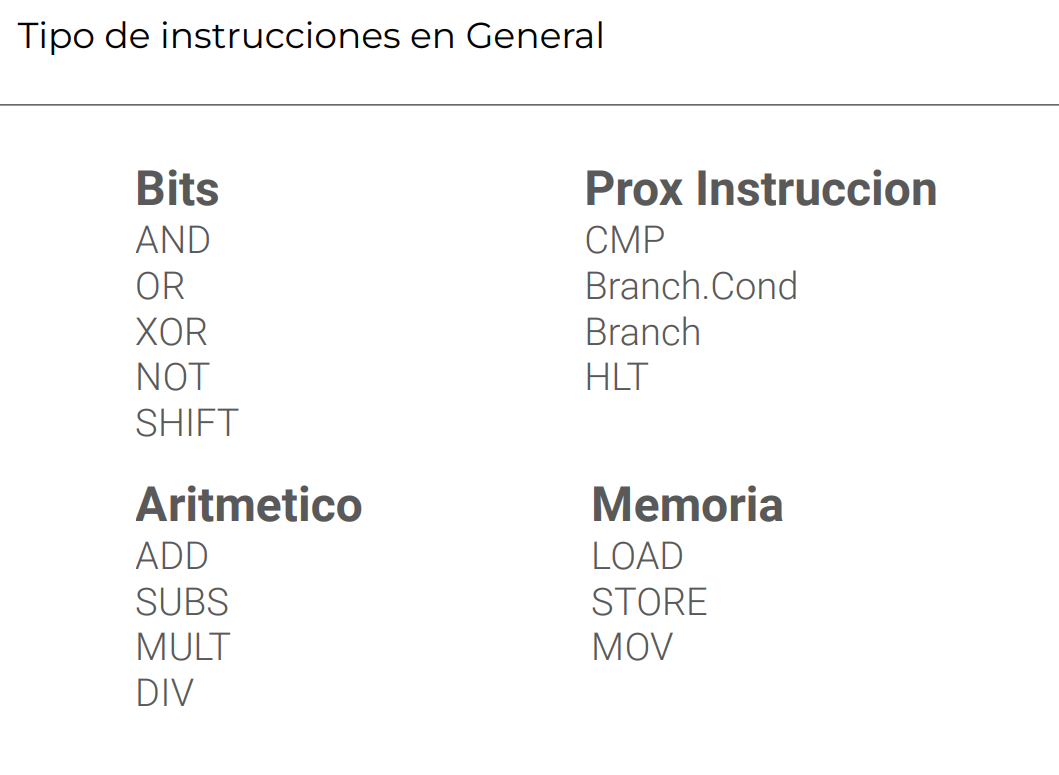

1- Instrucciones de Bits:

Estas instrucciones operan directamente sobre los bits individuales dentro de un registro o una palabra de datos. Son fundamentales para manipular datos a bajo nivel y controlar el hardware.

- AND: Realiza una operación lógica AND bit a bit entre dos operandos. Solo se establece un bit en el resultado si los bits correspondientes en ambos operandos son 1.

- OR: Realiza una operación lógica OR bit a bit. Un bit en el resultado se establece si al menos uno de los bits correspondientes en los operandos es 1.

- XOR: Realiza una operación lógica XOR bit a bit. Un bit en el resultado se establece si los bits correspondientes en los operandos son diferentes.

- NOT: Realiza una operación lógica NOT, invirtiendo todos los bits del operando.

- SHIFT: Desplaza los bits de un operando a la izquierda o a la derecha. Puede ser lógico (rellenando con ceros) o aritmético (preservando el bit de signo en desplazamientos a la derecha).

2- Instrucciones Aritmeticas:

Estas instrucciones realizan operaciones matemáticas básicas. Son esenciales para cualquier cálculo o procesamiento de datos.

- ADD: Suma dos operandos y almacena el resultado.

- SUBS: Resta un operando de otro. En ARMv8, "SUBS" también puede actualizar las banderas de condición.

- MULT: Multiplica dos operandos y almacena el resultado.

- DIV: Divide un operando por otro y almacena el cociente.

3- Instrucciones de Memoria

Estas instrucciones son responsables de mover datos entre registros y la memoria, lo cual es crucial para la manipulación de datos en la ejecución de programas.

- LOAD: Carga un valor desde una dirección de memoria en un registro.

- STORE: Almacena el valor de un registro en una dirección de memoria.

- MOV: Mueve o copia datos de un registro a otro. Puede también implicar mover datos de memoria a un registro o viceversa.

4- Instrucciones de control de flujo (Prox Instruccion)

Estas instrucciones controlan la secuencia de ejecución de un programa, permitiendo saltos condicionales y bucles.

- CMP: Compara dos valores y establece las banderas de condición sin almacenar el resultado.

- Branch.Cond: Realiza un salto a otra parte del código si se cumple una condición específica (por ejemplo, si una comparación previa resultó en igualdad).

- Branch: Realiza un salto incondicional a otra parte del código.

- HLT: Detiene la ejecución del programa o pone la CPU en un estado de espera.

Resumen:

Este tipo de clasificación de instrucciones es común en la programación en ensamblador y describe las operaciones fundamentales que una CPU puede realizar. Cada tipo de instrucción sirve para un propósito específico, desde manipular bits individuales, realizar cálculos aritméticos, mover datos entre memoria y registros, hasta controlar la ejecución del programa. Las instrucciones de bits y aritméticas permiten el procesamiento directo de datos, mientras que las instrucciones de memoria y de control de flujo permiten organizar y ejecutar el programa de manera efectiva.

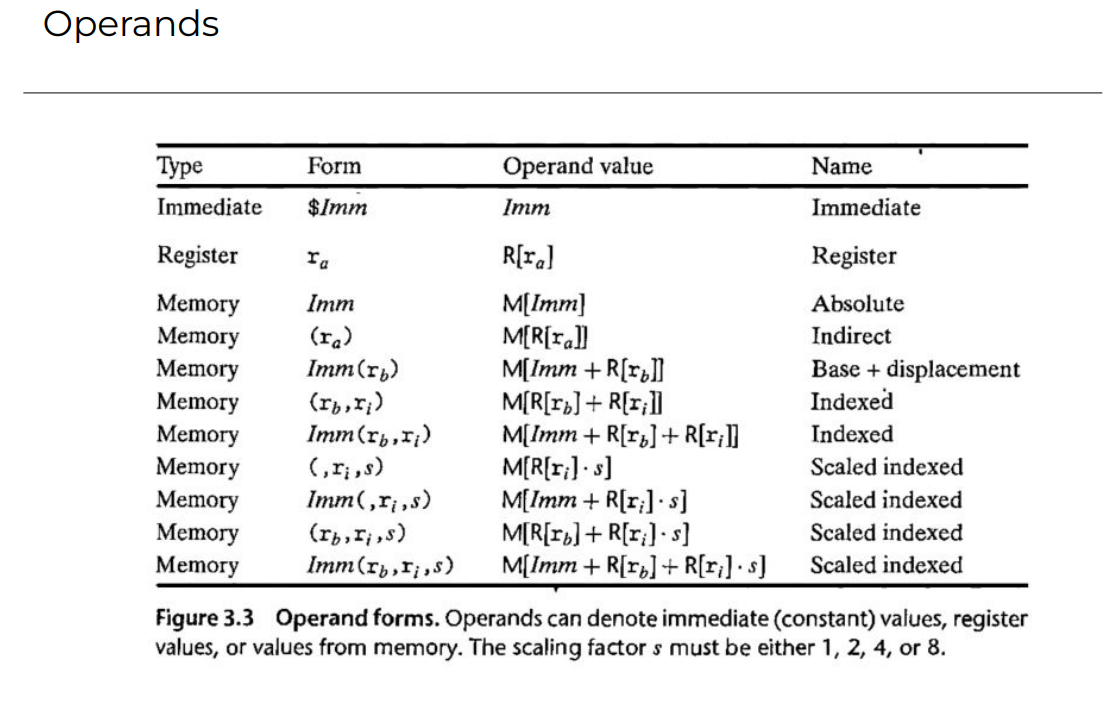

RISC VS CISC

RISC (Reduced Instruction Set Computer)

- Instrucciones basicas:

    - La arquitectura RISC estan diseniada con un conjunto de instrucciones reducido y simple. Cada instruccion realiza una operacion muy basica, como una suma o un desplazamiento de bits.

- Acceso a memoria limitado a Load/Store:

    - En RISC, la unica manera de interactuar con la memoria es mediante instrucciones de carga ('LOAD') y almacenamiento ('STORE'). Todas las demas operaciones (suma, resta, etc) se realizan unicamente entre registros, no directamente en memoria.

- Ejemplo: ARMv8:

    - ARMv8 es una arquitectura RISC moderna que es muy utilizada moviles y embebidos. Es eficiente y de baja potencia, aprovechando las ventajas de la simplcidad del disenio RISC.

- Instrucciones del mismo tamanio:

    - En una arquitectura RISC, todas las instrucciones generalmente tiene el mismo tamanio (por ejemplo, 32 bits). Esto simplifica el proceso de "fetch" (recupeeracion), "decode" (decodificacion), y "execute" (ejecucion) dentro de la CPU, ya que el hardware puede manejar todas las instrucciones de manera uniforme.

- Mas instrucciones para hacer lo mismo, pero mas simple y rapidas:

    - Aunque las arquitecturas RISC pueden requerir más instrucciones para completar una tarea compleja (en comparación con CISC), cada instrucción es rápida y eficiente. La idea es que la simplicidad de las instrucciones permita una ejecución más rápida, y la optimización del tiempo se logra mediante la velocidad de estas instrucciones simples.


CISC (Complex Instruction Set Computer)

- Instrucciones sofisticadas:

    - En las arquitecturas CISC, las instrucciones son más complejas y pueden realizar múltiples operaciones en una sola instrucción. Por ejemplo, una sola instrucción puede cargar datos desde la memoria, realizar una operación aritmética y almacenar el resultado de nuevo en la memoria.

- Instrucciones con acceso a memoria integrado:

    - A diferencia de RISC, en CISC, las instrucciones pueden interactuar directamente con la memoria sin necesidad de pasar primero por los registros. Esto puede hacer que algunas operaciones sean más rápidas en términos de número de instrucciones necesarias.

- Ejemplo: x86:

    - La arquitectura x86, introducida por Intel, es un ejemplo clásico de CISC. Es muy utilizada en computadoras personales y servidores. La x86 tiene una larga historia y ha evolucionado considerablemente, pero sigue siendo una arquitectura CISC en su núcleo.

- Instrucciones de diferentes tamaños:

    - En CISC, las instrucciones pueden tener diferentes longitudes (en bits), lo que añade complejidad al proceso de "fetch" y "decode". La CPU debe ser capaz de manejar instrucciones de longitud variable, lo que puede requerir más circuitería y diseño más complejo.

Comparación General

- Simplicidad vs. Complejidad:

    - RISC: Busca la simplicidad en el diseño, lo que facilita la optimización y permite una ejecución rápida de instrucciones simples.

    - CISC: Prioriza la complejidad en las instrucciones individuales, permitiendo que una sola instrucción realice tareas complejas, a menudo reduciendo el número de instrucciones necesarias para realizar una tarea.

- Eficiencia:

    - RISC: Es eficiente en términos de velocidad por instrucción, aprovechando pipelines y otras optimizaciones modernas de CPU.
    
    - CISC: Es eficiente en términos de reducir el número de instrucciones, pero cada instrucción puede tomar más ciclos de reloj para completarse debido a su complejidad.

- Uso práctico:

    - RISC: Encontrado en sistemas donde la eficiencia y el bajo consumo de energía son críticos, como en dispositivos móviles y embebidos (ARMv8, por ejemplo).

    - CISC: Común en sistemas donde la compatibilidad hacia atrás y la capacidad de manejar tareas complejas con menos código es importante, como en PCs y servidores (x86).


ARMv8

ARMv8 es una arquitectura de procesador desarrollada por ARM Holdings, que es una de las familias de arquitecturas de procesadores más utilizadas en el mundo, especialmente en dispositivos móviles y sistemas embebidos. A continuación te explico los aspectos más importantes de ARMv8:

1- Evolucion y Caracteristicas Principales

- Arquitectura ARM: ARM (Advanced RISC Machine) es una familia de arquitecturas de procesadores basadas en el conjunto de instrucciones RISC (Reduced Instruction Set Computer). ARM se caracteriza por su eficiencia energética, lo que la hace ideal para dispositivos como smartphones, tablets, dispositivos IoT, y más.

- ARMv8: Es la octava versión principal de la arquitectura ARM, lanzada en 2011. Es una evolución de las versiones anteriores (como ARMv7), e introduce características importantes, como soporte para instrucciones de 64 bits.

2- Soporte para 64 bits

- AArch64: ARMv8 introduce un nuevo modo de ejecución llamado AArch64, que permite que los procesadores ejecuten instrucciones de 64 bits. Esto permite manejar más memoria (más de 4 GB) y realizar operaciones con datos más grandes de manera más eficiente.

- AArch32: Aunque ARMv8 es principalmente conocido por su soporte de 64 bits, también mantiene compatibilidad con instrucciones de 32 bits a través del modo AArch32, lo que permite ejecutar código diseñado para versiones anteriores de ARM (como ARMv7).

3- Nuevos registros y conjunto de instrucciones

- Registros de 64 bits: ARMv8 tiene 31 registros de propósito general (X0 a X30), cada uno de 64 bits de ancho, lo que permite operaciones con datos más grandes.

- Conjunto de Instrucciones: ARMv8 amplía el conjunto de instrucciones, incluyendo instrucciones específicas para operaciones de 64 bits, mientras mantiene las características de RISC, como instrucciones simples y uniformes.

4- Ventaja y Usos

- Eficiencia Energética: Una de las mayores ventajas de ARMv8, como todas las arquitecturas ARM, es su eficiencia energética, lo que la hace ideal para dispositivos móviles que necesitan ahorrar batería.

- Rendimiento: Al soportar 64 bits, ARMv8 permite un mayor rendimiento en aplicaciones que requieren procesar grandes cantidades de datos o manejar grandes espacios de memoria, como en servidores y dispositivos de alta gama.

- Compatibilidad: ARMv8 es compatible con software desarrollado para arquitecturas anteriores de ARM, lo que facilita la transición de 32 a 64 bits sin perder compatibilidad con aplicaciones existentes.

5- Aplicaciones comunes

- Dispositivos Móviles: La mayoría de los smartphones y tablets modernos utilizan procesadores basados en ARMv8 debido a su equilibrio entre rendimiento y eficiencia energética.

- Servidores y Computación en la Nube: ARMv8 también se está utilizando en centros de datos y servidores, donde su capacidad para manejar grandes cantidades de datos con eficiencia energética es una gran ventaja.

- Dispositivos Embebidos: Desde routers hasta dispositivos IoT, ARMv8 se utiliza en una amplia gama de dispositivos embebidos debido a su flexibilidad y eficiencia.

Resumen

ARMv8 es una arquitectura moderna y eficiente que lleva la arquitectura ARM a la era de 64 bits, proporcionando más capacidad de procesamiento y manejo de memoria, manteniendo su tradicional eficiencia energética. Su versatilidad y compatibilidad con versiones anteriores han hecho de ARMv8 una opción popular en una amplia gama de dispositivos, desde smartphones hasta servidores.


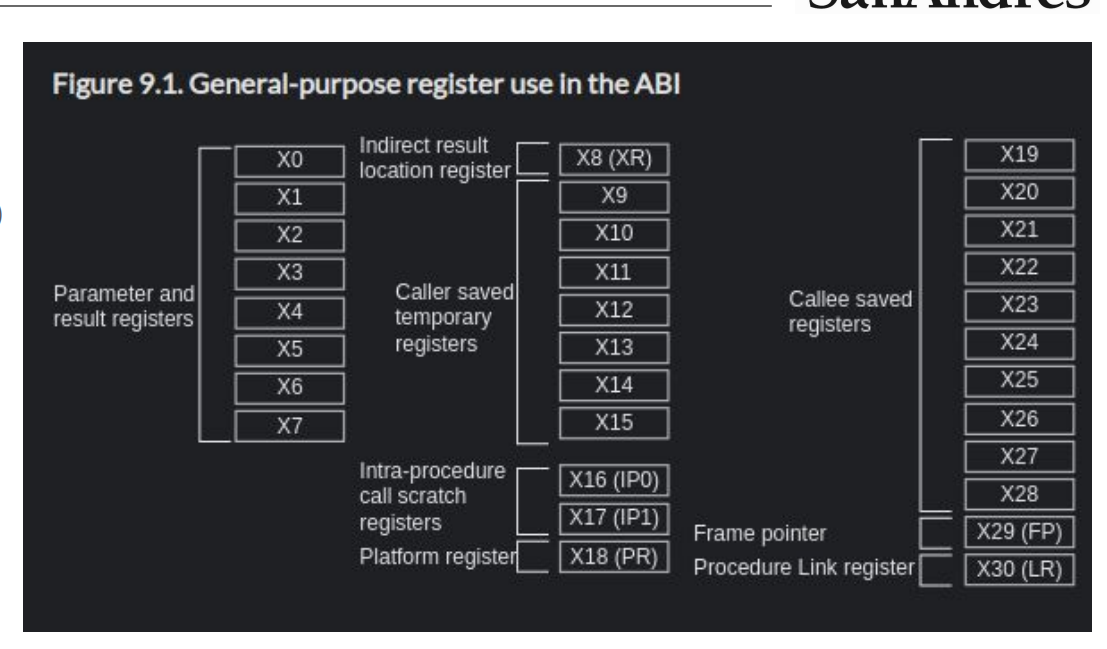

La imagen muestra la disposicion y el uso de los registros de proposito general en la arquitectura ARMv8 de 64 bits.

1- Registros de Proposito General (General-Purpouse Registers)

- ARMv8 tiene 31 registros de 64 bits de propósito general, numerados de X0 a X30.

- El registro X31 no se muestra aquí porque se considera el registro cero (denotado a menudo como ZR). Este registro siempre contiene el valor 0 y se utiliza cuando se necesita un valor cero constante.

2- Tipos de Registros

Los registros de propósito general en ARMv8 se utilizan para diferentes propósitos según las convenciones del ABI (Application Binary Interface), que define cómo se utilizan estos registros en la llamada a funciones y en la gestión de la pila. Aquí hay una descripción de cada grupo de registros:

- Parameter and Result Registers (X0 - X7):

    - Estos registros se utilizan para pasar parámetros a las funciones y también para devolver los resultados.

    - Por ejemplo, cuando llamas a una función que suma dos números, los operandos se pueden pasar a través de X0 y X1, y el resultado se devuelve en X0.

- Caller Saved Temporary Registers (X8 - X15):

    - También conocidos como registros volátiles o temporales.

    - Si una función necesita utilizar estos registros, debe guardar (salvar) su contenido en la pila antes de usarlos y restaurarlo antes de devolver el control.

    - X8 es especialmente importante porque se usa como registro para devolver ubicaciones indirectas de resultados, conocido como XR (indirect result location register).

- Callee Saved Registers (X19 - X28):

    - Estos registros deben ser preservados por la función llamada. Es decir, si una función utiliza estos registros, debe asegurarse de que su valor original se restaure antes de que la función termine.

    -Estos registros se utilizan a menudo para almacenar variables locales o resultados intermedios que deben persistir durante la ejecución de la función.

- Special Registers:

    - Frame Pointer (FP) - X29:

        -Utilizado para mantener la base del marco de la pila (stack frame). Ayuda en la creación de marcos de pila que se utilizan para rastrear las llamadas de función y acceder a los parámetros y variables locales.

    - Link Register (LR) - X30:

        - Almacena la dirección de retorno cuando se hace una llamada a función. Es el registro donde se guarda la dirección a la que se debe regresar cuando una función termina su ejecución.

- IP0/IP1/PR (X16, X17, X18):

    Estos registros se utilizan como registros temporales o de plataforma (Platform register). X16 y X17 son a menudo utilizados para llamadas a funciones indirectas y otras operaciones de trampolín, mientras que X18 puede ser utilizado por el sistema operativo o en algunas convenciones ABI para almacenamiento especial.

3- Program Counter (PC)

No se muestra explícitamente en el diagrama, pero ARMv8 también tiene un Program Counter (PC) que es un registro especial que apunta a la dirección de la próxima instrucción a ejecutar.

4- Stack Pointer (SP)

El Stack Pointer (SP), aunque no se muestra en este diagrama, es otro registro crítico que apunta a la parte superior de la pila actual. Se utiliza para gestionar la memoria de la pila, donde se almacenan variables locales, marcos de pila, direcciones de retorno, etc.

Resumen:

- ARMv8 de 64 bits tiene 31 registros de propósito general (X0 a X30).

- X31 es el registro cero que siempre contiene 0.

- Los registros se dividen en diferentes grupos según su función en las llamadas a funciones y la gestión de la pila.

- Además, existen registros especiales como el FP (Frame Pointer), LR (Link Register) y registros temporales (IP0, IP1, PR).

- El Program Counter (PC) y el Stack Pointer (SP) son registros esenciales para la ejecución y gestión de la pila, respectivamente.
